In [1]:
import numpy as np
import scipy.stats as ss
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [22, 9]
plt.rcParams.update({'font.size': 15})
plt.rcParams['lines.linewidth'] = 2

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Data from Kaggle
- https://www.kaggle.com/imdevskp/corona-virus-report?select=day_wise.csv

In [11]:
df = pd.read_csv('day_wise.csv',index_col='Date', parse_dates=True)

In [12]:
# df = pd.read_csv('Data/day_wise.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date',inplace=True)

In [13]:
df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [15]:
df.shape

(188, 11)

In [16]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=188, freq=None)

In [17]:
df.index.max()

Timestamp('2020-07-27 00:00:00')

In [18]:
df.index.min()

Timestamp('2020-01-22 00:00:00')

In [19]:
df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


Confirmed


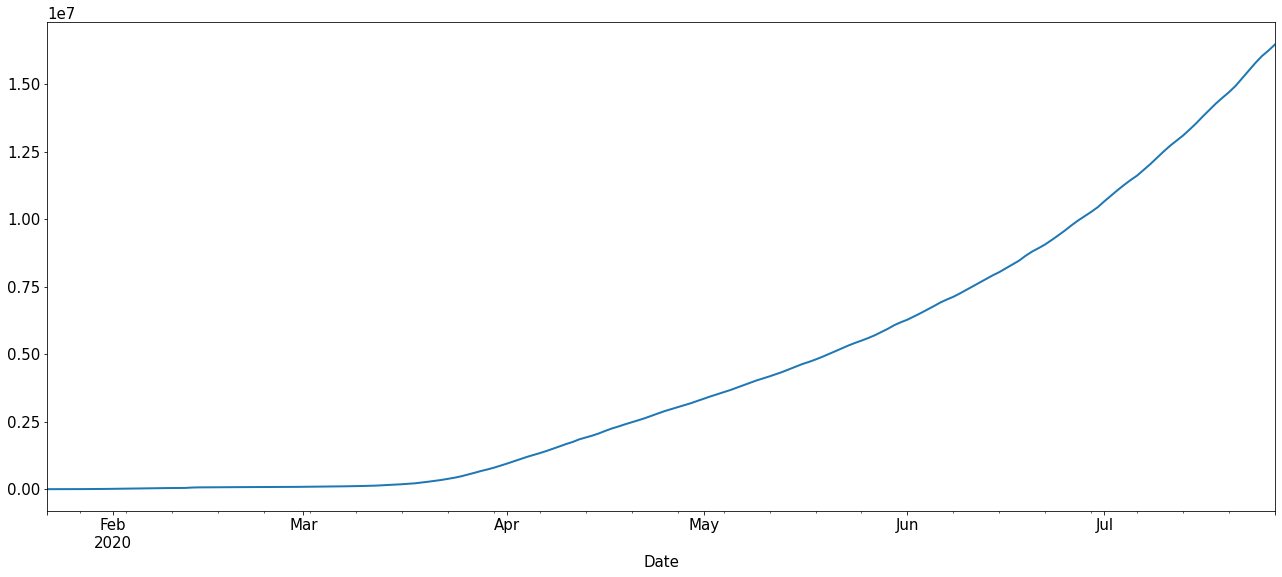

Deaths


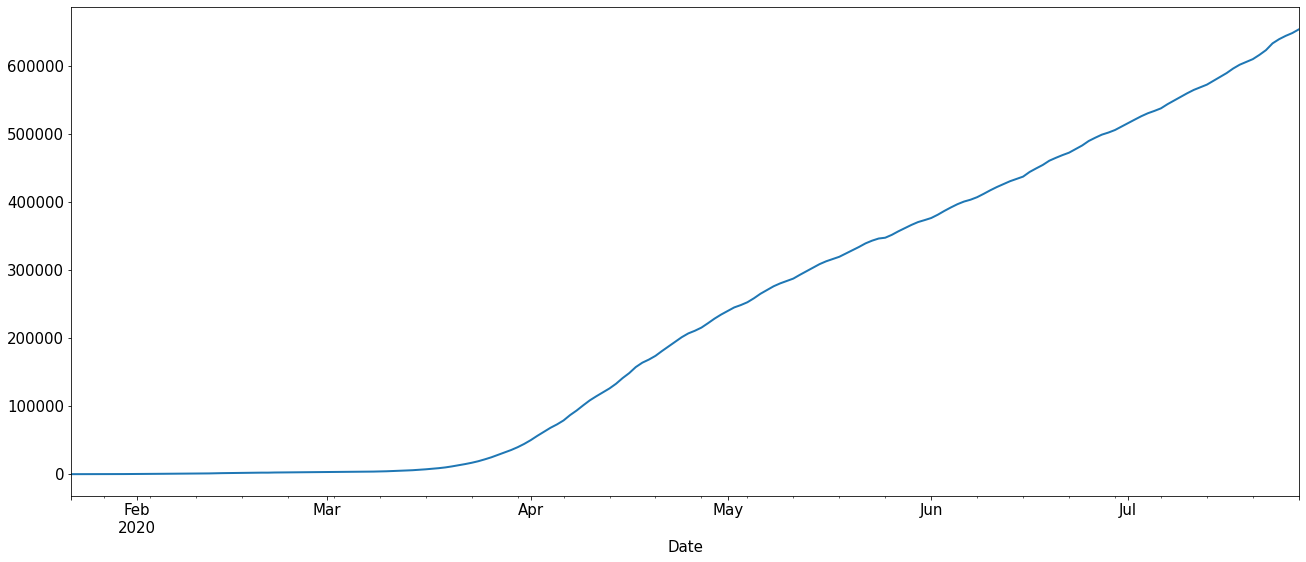

Recovered


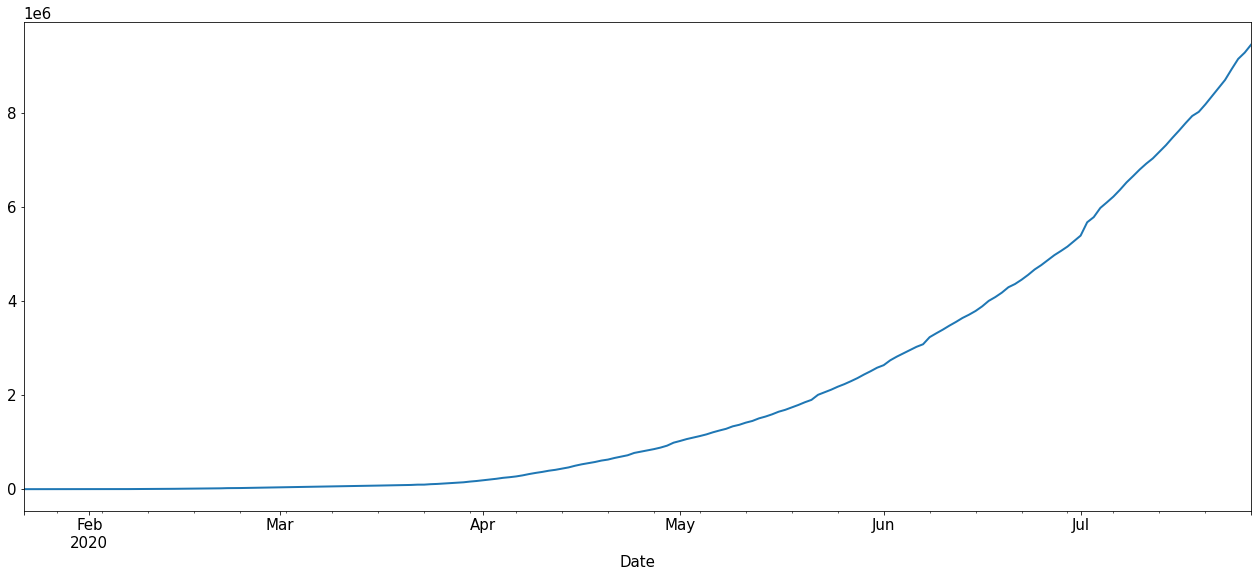

Active


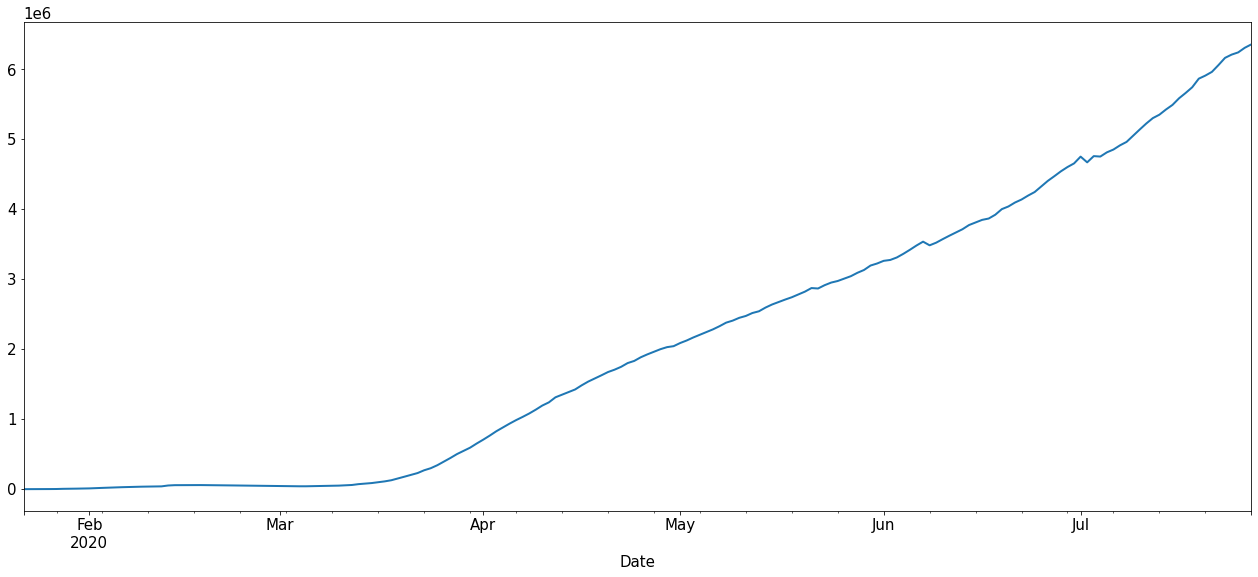

New cases


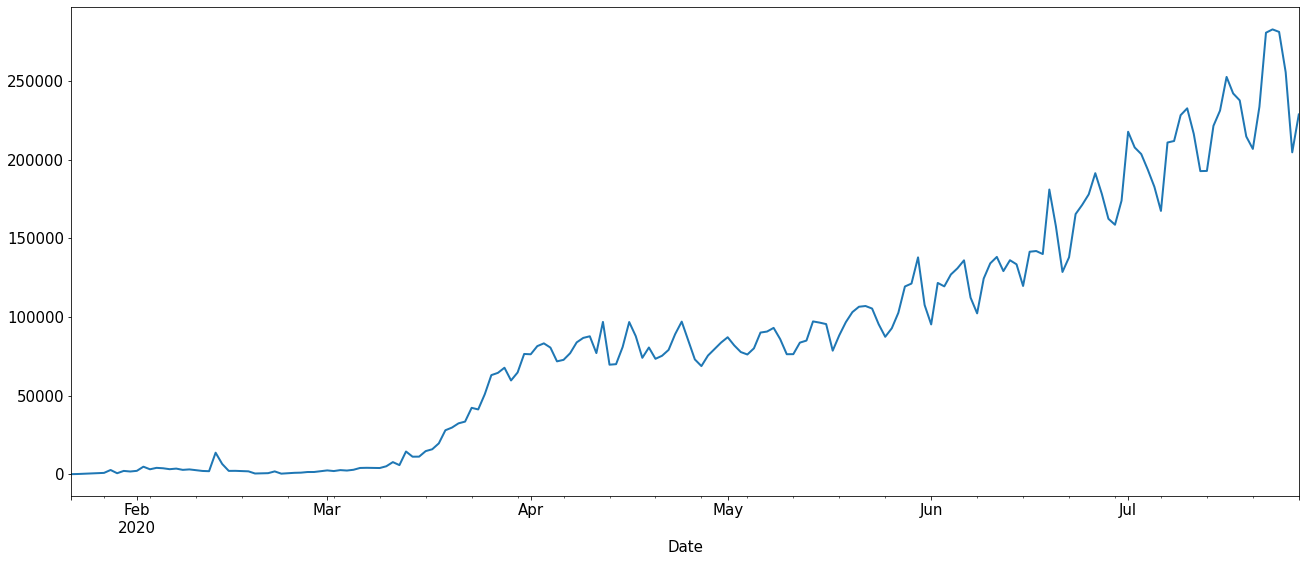

New deaths


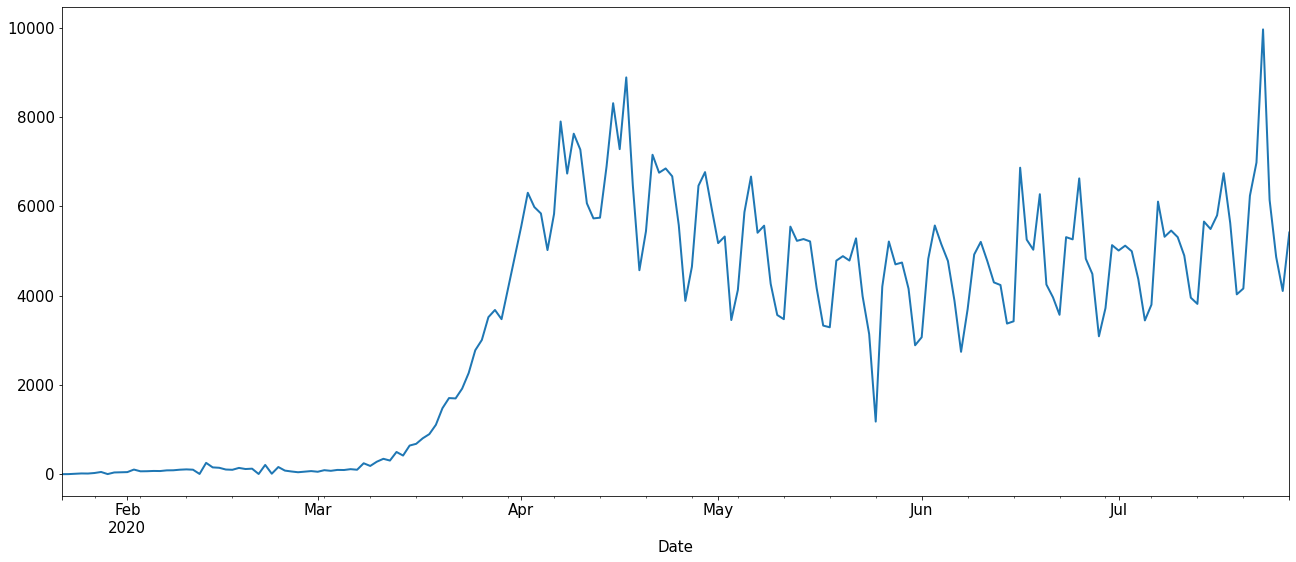

New recovered


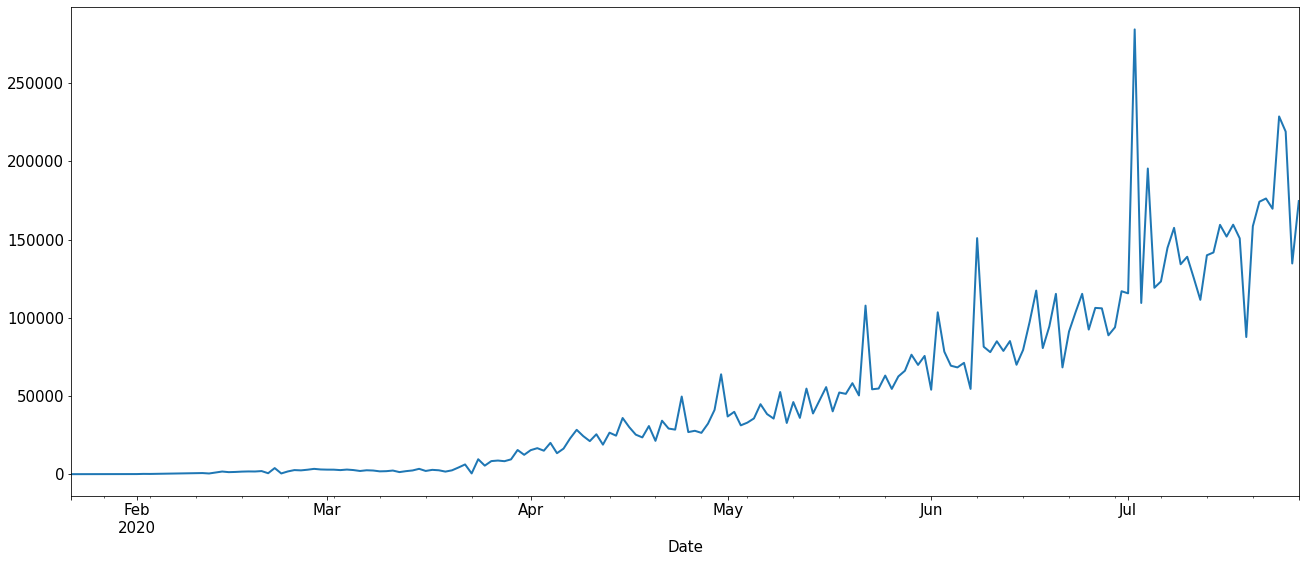

Deaths / 100 Cases


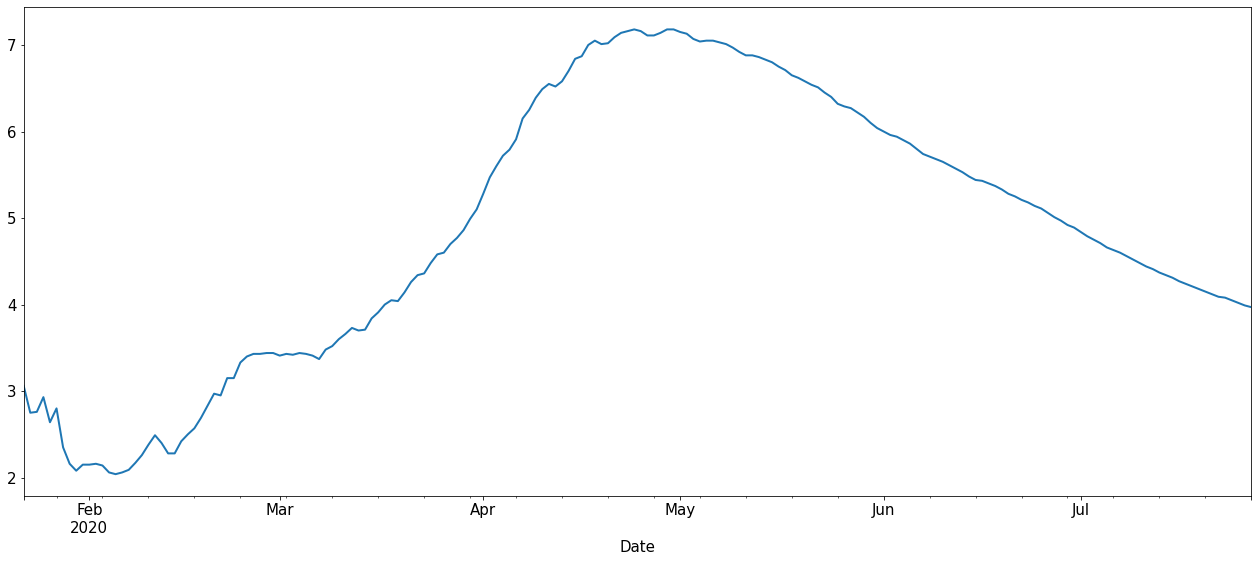

Recovered / 100 Cases


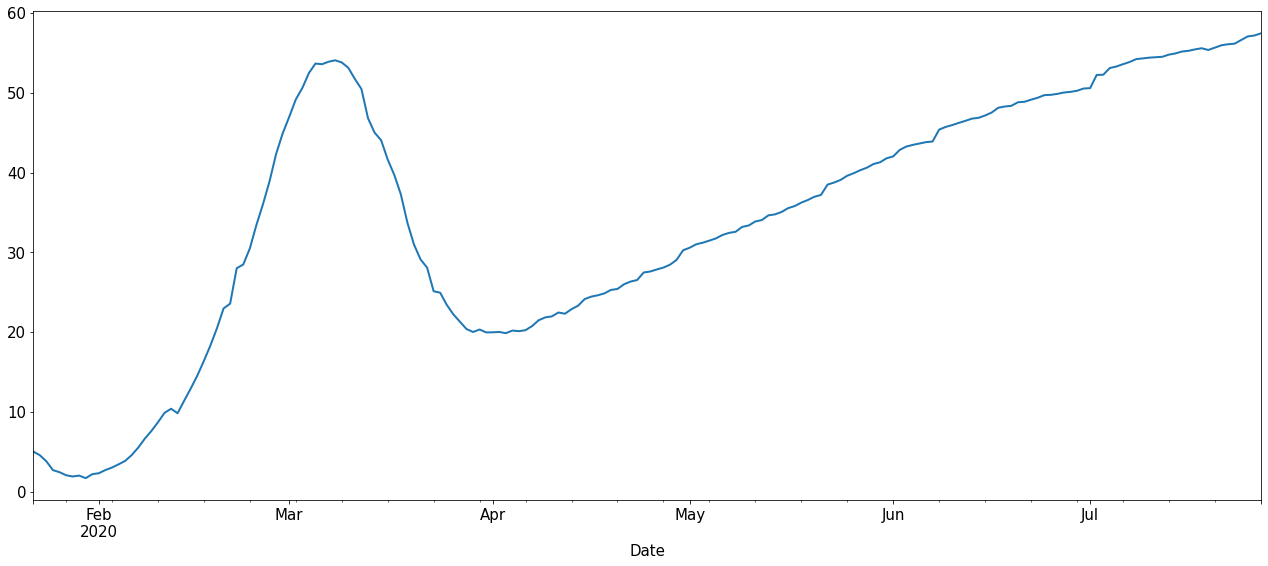

Deaths / 100 Recovered


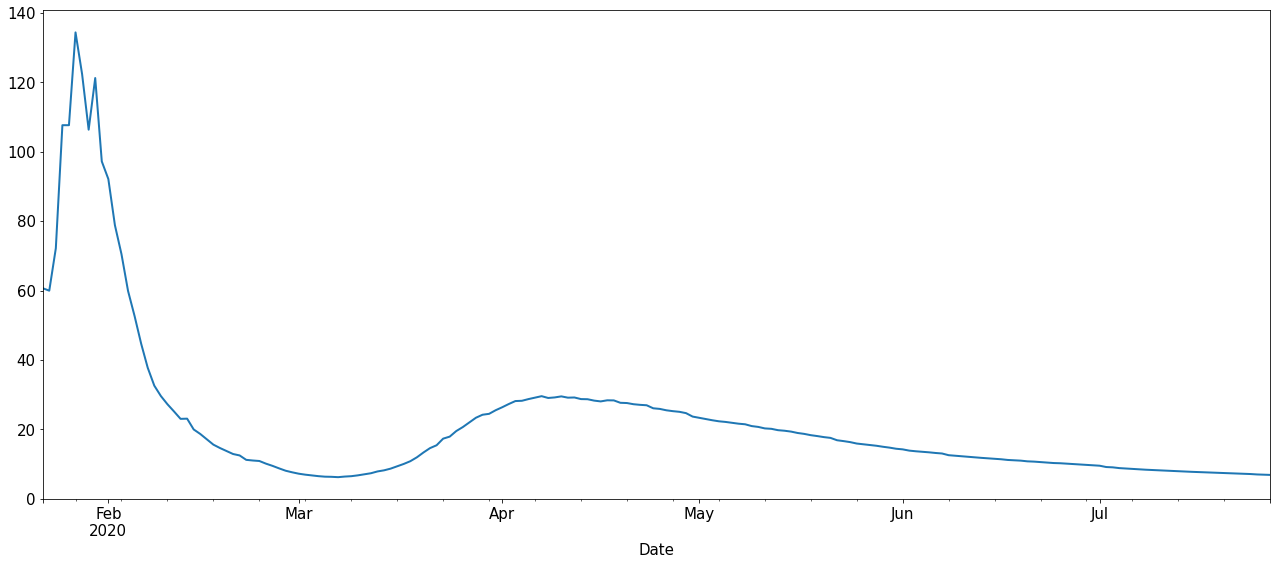

No. of countries


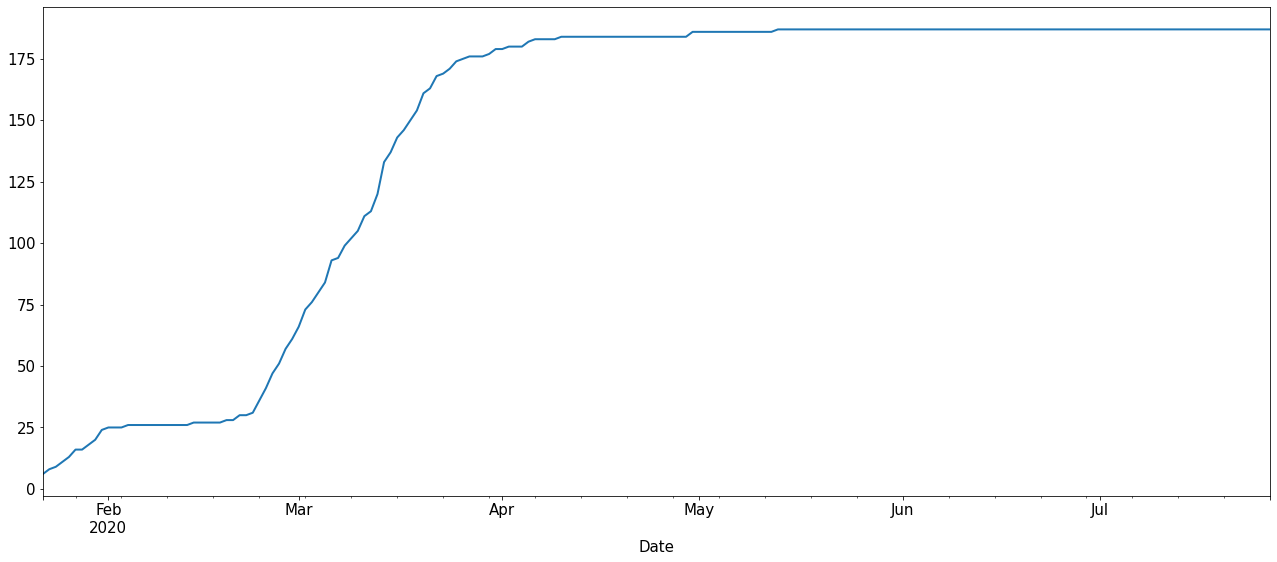

In [20]:
for col in df.columns:
    print(col)
    df[col].plot()
    plt.show()

## "New cases" column

<AxesSubplot:xlabel='Date'>

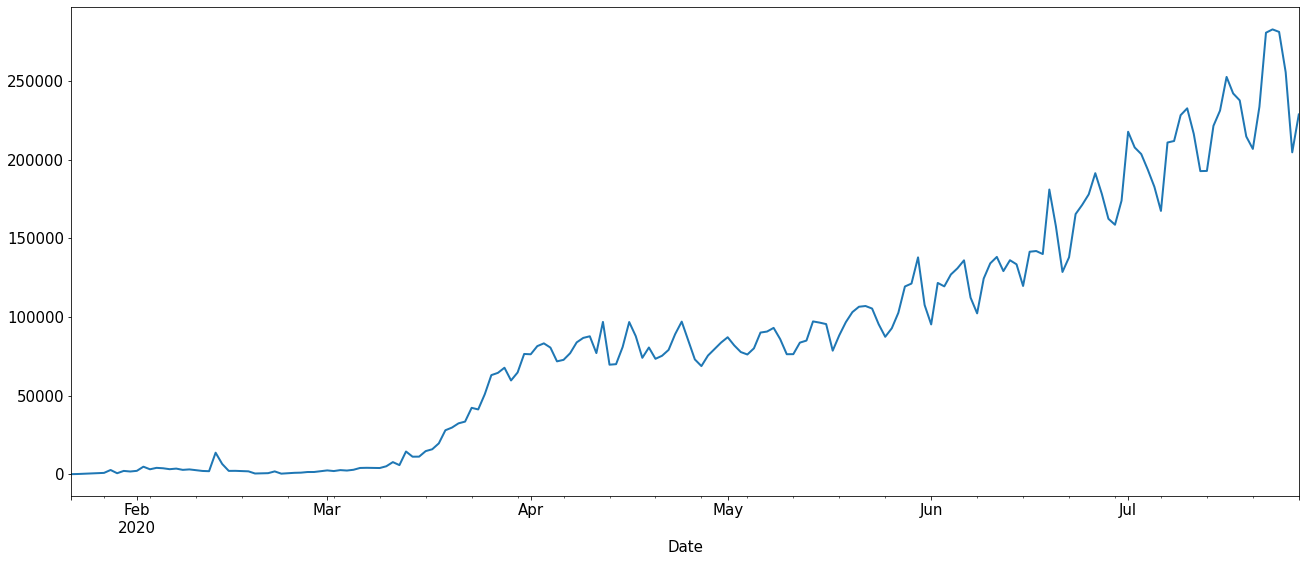

In [21]:
df['New cases'].plot()

Com base neste gráfico, parece que a tendência nos dias anteriores está aumentando a uma taxa mais alta do que apenas linear (embora seja um pouco difícil dizer a partir deste gráfico).

- Statsmodels fornece uma "seasonal deomposition tool" que podemos usar para separar os diferentes componentes:
     - Componente de sazonalidade
     - Componente de tendência
     - Componente de erro (residual) (comportamento não explicado pelos componentes de sazonalidade e tendência)

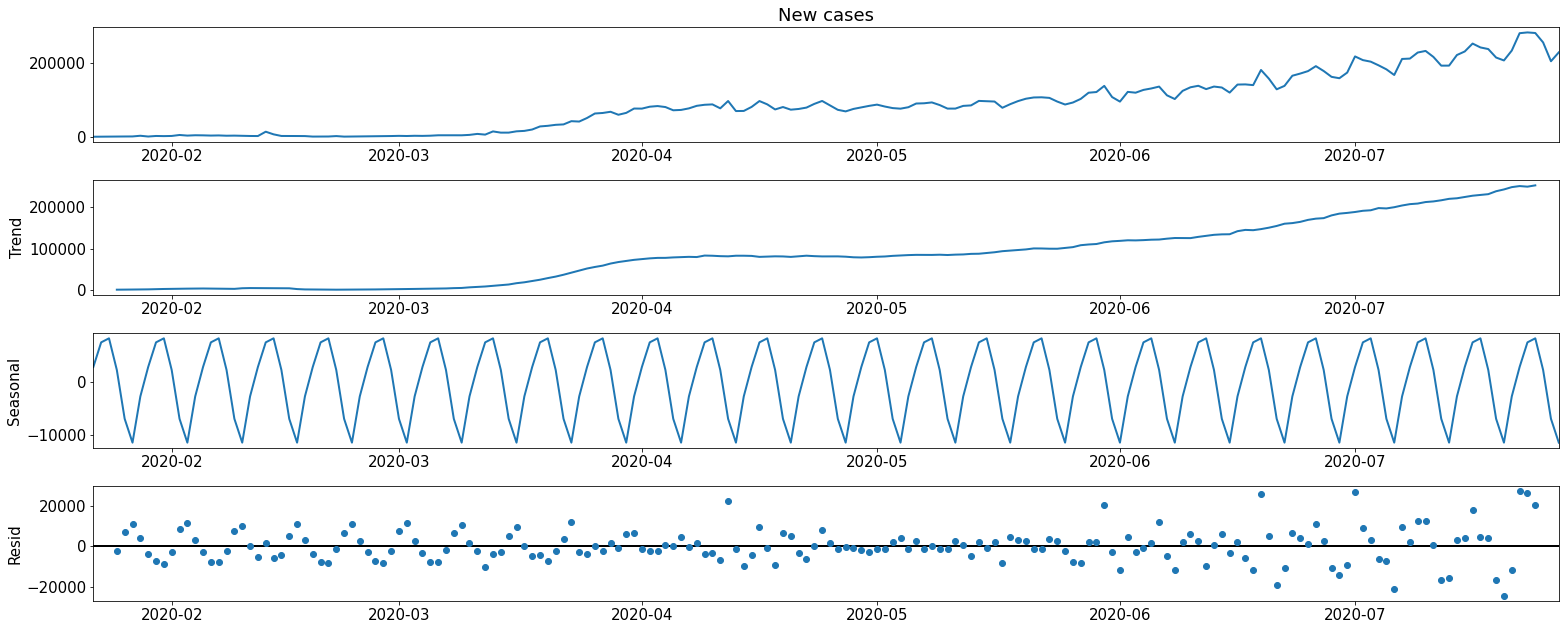

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['New cases'])
result.plot();

## Resample method

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [23]:
df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [25]:
df.shape

(188, 11)

In [27]:
df.resample(rule='M').mean()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-31,3853.40,88.90,83.80,3680.70,937.20,19.60,19.10,2.57,2.86,99.01,14.10
2020-02-29,57359.90,1616.38,12540.31,43203.21,2599.28,93.90,1313.62,2.64,17.31,27.60,31.38
2020-03-31,290413.39,12825.84,85302.32,192285.23,25356.90,1340.06,4379.35,4.01,38.65,12.47,133.68
2020-04-30,2113055.40,143707.13,531467.33,1437880.93,80412.77,6340.87,27184.73,6.62,24.14,27.59,183.30
2020-05-31,4677109.65,309987.23,1705704.45,2661417.97,94227.16,4480.71,51483.00,6.69,35.86,18.90,186.61
2020-06-30,8217526.23,443635.10,3899475.60,3874415.53,142193.37,4586.80,89862.33,5.45,47.08,11.64,187.00
2020-07-31,13440586.96,581839.52,7392378.67,5466368.78,223367.07,5289.85,155060.30,4.36,54.80,7.98,187.00


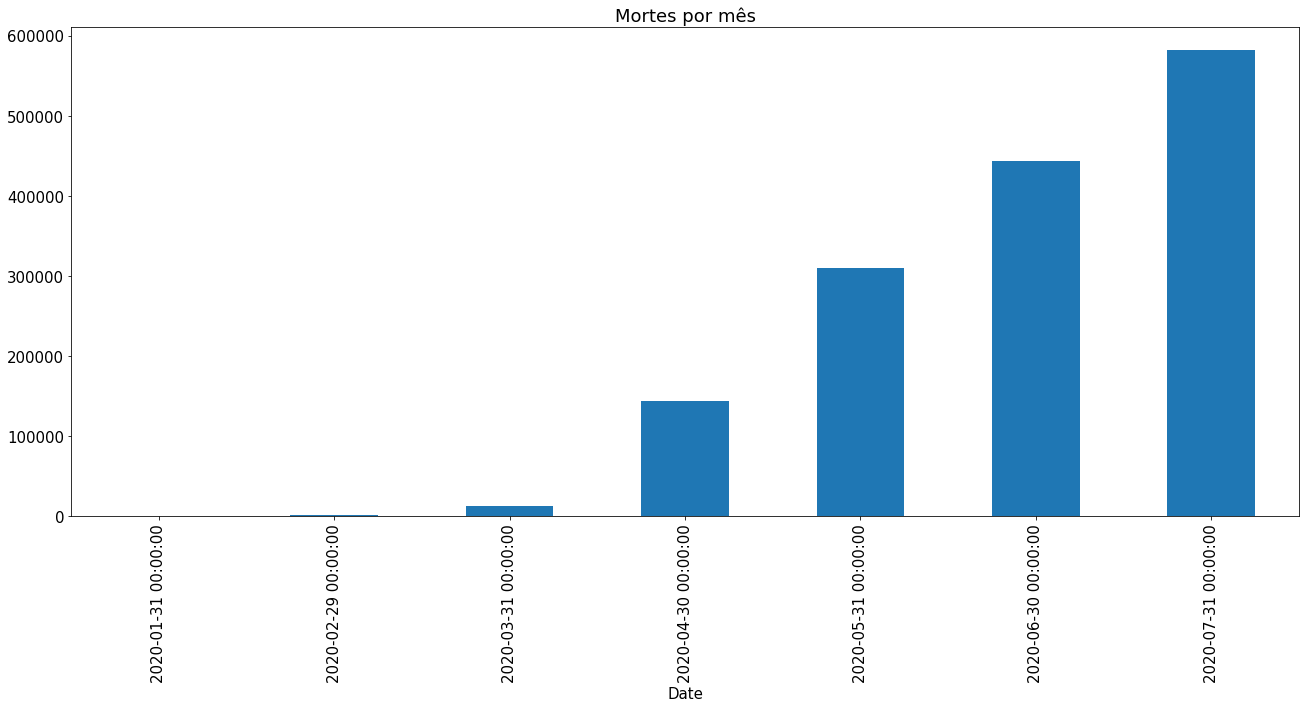

In [28]:
title = 'Mortes por mês'
df['Deaths'].resample('M').mean().plot.bar(title=title,color='#1f77b4');

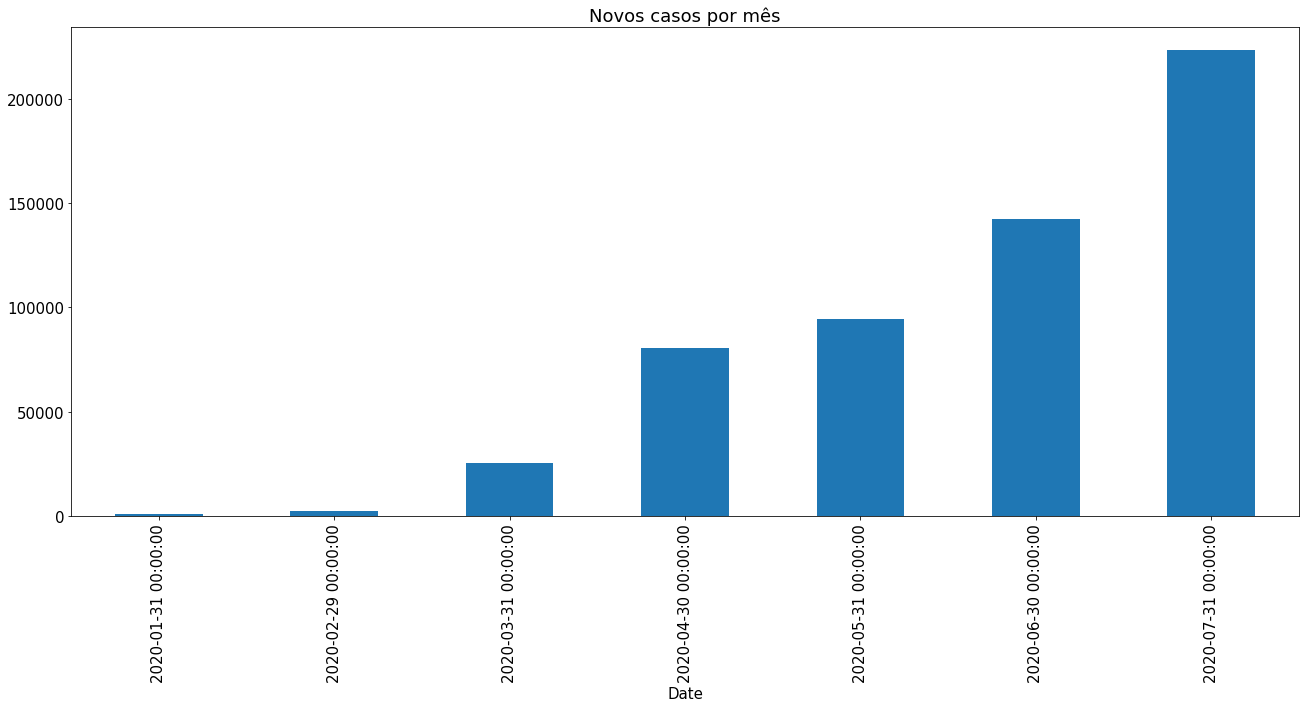

In [29]:
title = 'Novos casos por mês'
df['New cases'].resample('M').mean().plot.bar(title=title,color='#1f77b4');

## Rolling method

### Simple Moving Average

In [30]:
df = df[['New cases']]

In [32]:
df.head(10)

,New cases
Date,
2020-01-22,0
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684
2020-01-27,809
2020-01-28,2651
2020-01-29,588
2020-01-30,2068


In [33]:
df['SMA5'] = df['New cases'].rolling(window=5).mean()
df['SMA10'] = df['New cases'].rolling(window=10).mean()
df['SMA30'] = df['New cases'].rolling(window=30).mean()

In [34]:
df.head(15)

,New cases,SMA5,SMA10,SMA30
Date,,,,
2020-01-22,0,NaN,NaN,NaN
2020-01-23,99,NaN,NaN,NaN
2020-01-24,287,NaN,NaN,NaN
2020-01-25,493,NaN,NaN,NaN
2020-01-26,684,312.60,NaN,NaN
2020-01-27,809,474.40,NaN,NaN
2020-01-28,2651,984.80,NaN,NaN
2020-01-29,588,1045.00,NaN,NaN
2020-01-30,2068,1360.00,NaN,NaN


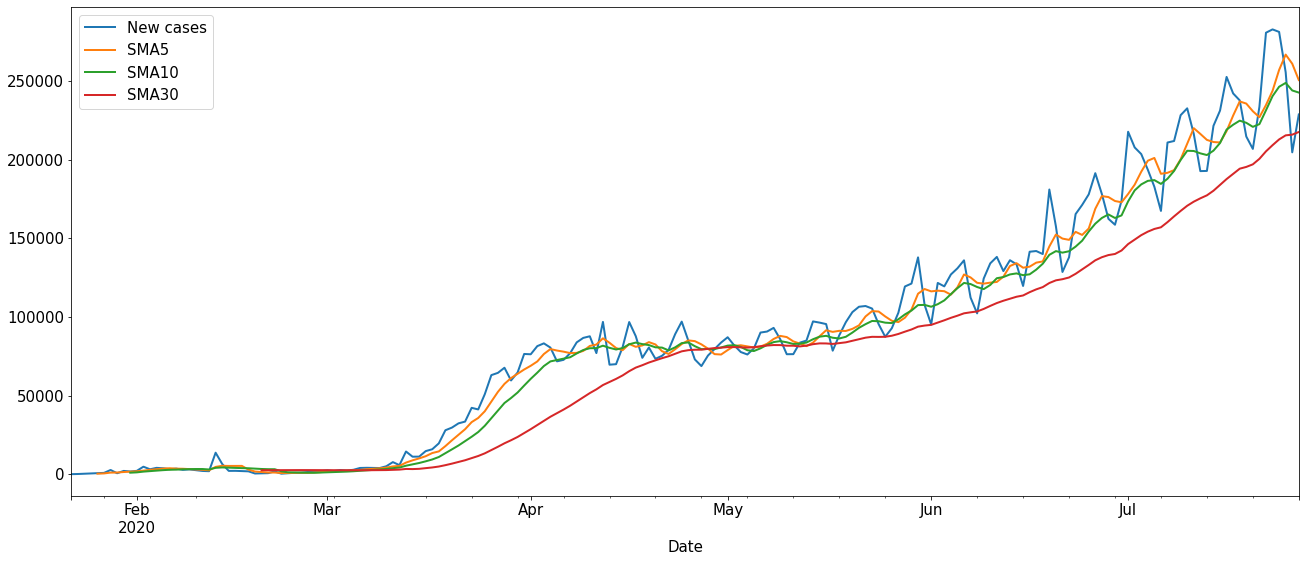

In [39]:
df.plot();

### Expanding method

- Ao ínves de considerar os valores da janela deslizante de 7 dias, por exemplo, desejamos avaliar todos os dados da série temporal até determinado instante de tempo.
    - Similar a CDF (Cumulative distribution function)

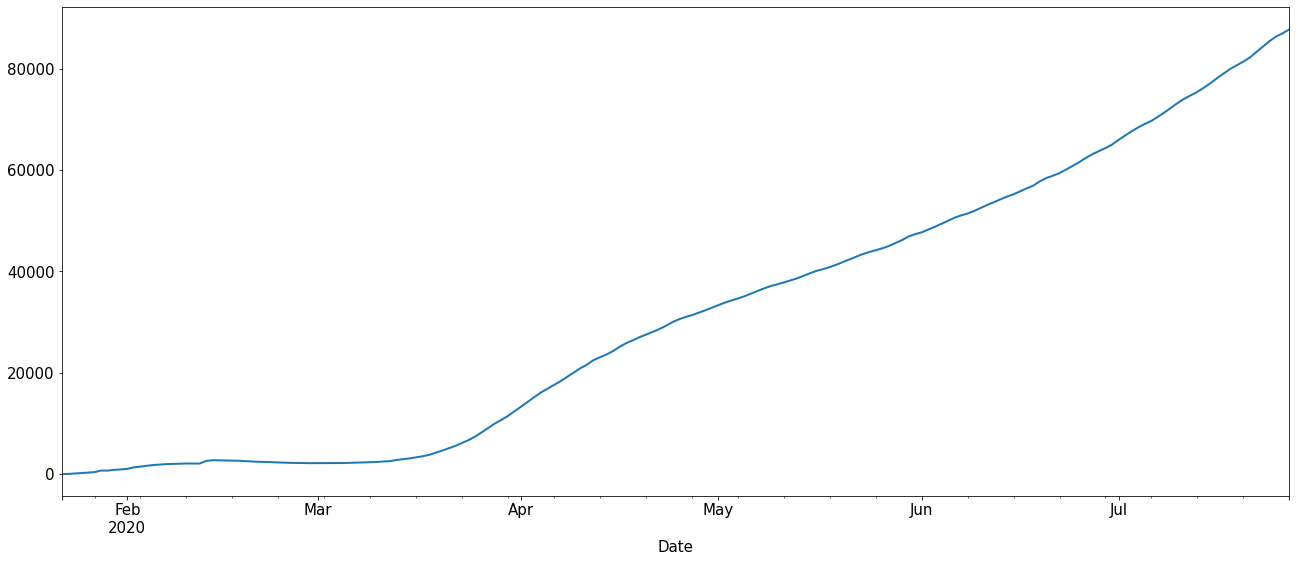

In [40]:
df['New cases'].expanding().mean().plot();

# EWMA
## Exponentially Weighted Moving Average (Média Móvel Ponderada Exponencialmente)

Acabamos de calcular o SMA com base em alguma janela. No entanto, o SMA básico tem alguns pontos fracos:
* Janelas menores levarão a mais ruído
* Sempre ficará defasado (lag) pelo tamanho da janela
* Nunca atingirá o pico ou o vale completo dos dados devido à média.
* Realmente não informa sobre possíveis comportamentos futuros, tudo o que realmente faz é descrever tendências em seus dados.
* Valores históricos extremos podem distorcer SMA significativamente

Para ajudar a corrigir alguns desses problemas, podemos usar um <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>. 

In [41]:
# span parameter: span corresponds to what is commonly called an "N-day EW moving average"
df['EWMA5'] = df['New cases'].ewm(span=5).mean()

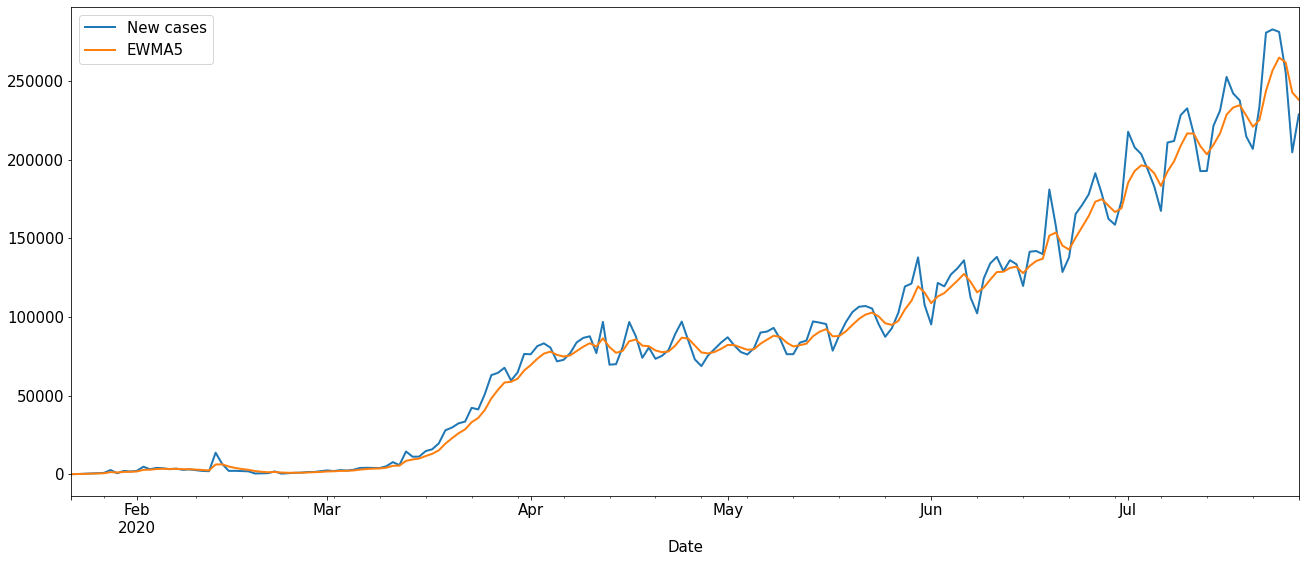

In [44]:
df[['New cases','EWMA5']].plot();

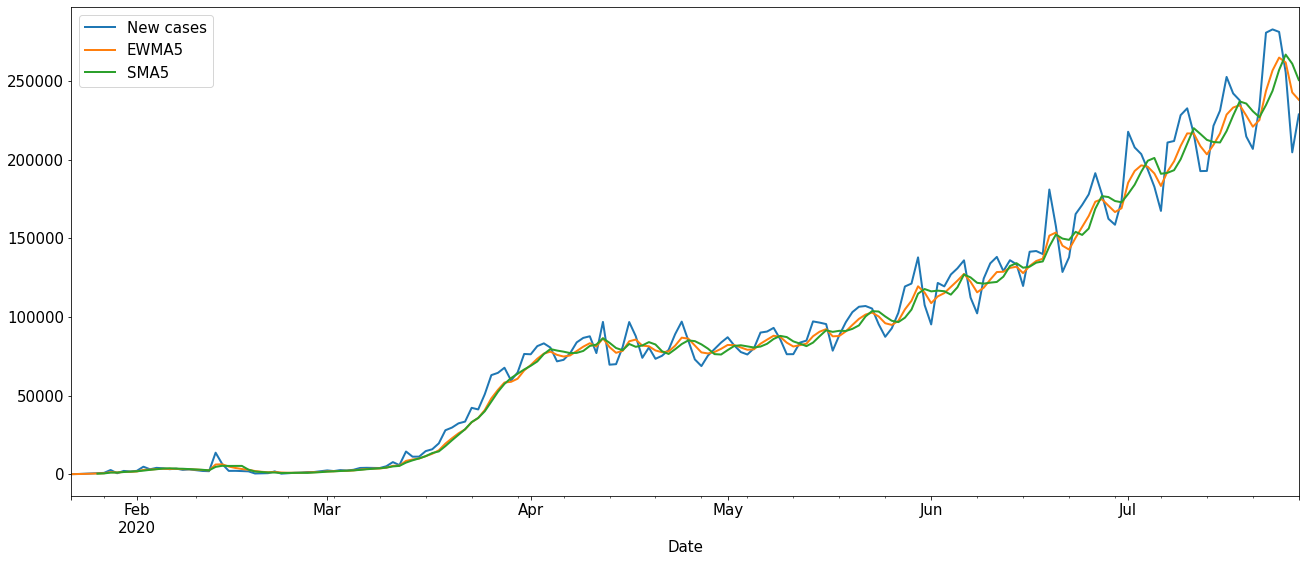

In [45]:
df[['New cases','EWMA5','SMA5']].plot();

## Simple Exponential Smoothing

No exemplo acima usamos <em>Simple Exponential Smoothing</em> com um fator de suavização <strong>α</strong>. Infelizmente, essa técnica produz uma previsão ruim quando há uma "trend" nos dados, como visto acima. Na próxima seção veremos o <em>Double</em> e o <em>Triple Exponential Smoothing</em> com os métodos Holt-Winters.

In [46]:
df.head()

,New cases,SMA5,SMA10,SMA30,EWMA5
Date,,,,,
2020-01-22,0,NaN,NaN,NaN,0.00
2020-01-23,99,NaN,NaN,NaN,59.40
2020-01-24,287,NaN,NaN,NaN,167.21
2020-01-25,493,NaN,NaN,NaN,302.54
2020-01-26,684,312.60,NaN,NaN,448.98


# Holt-Winters Methods
Na seção anterior, aplicamos a <em>Simple Exponential Smoothing</em> usando apenas um fator de suavização $\alpha$ (alpha). Isso não levou em conta outros fatores contribuintes, como tendência e sazonalidade.

Nesta seção, veremos <em>Double</em> e <em>Triple Exponential Smoothing</em> com o <a href='https://otexts.com/fpp2/holt-winters.html' >Holt-Winters Methods</a>.

Em <strong>Double Exponential Smoothing</strong> (também conhecido como Holt's Method), introduzimos um novo fator de suavização $\beta$ (beta) que aborda a tendência:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Como ainda não consideramos as flutuações sazonais, o modelo de previsão é simplesmente uma linha reta inclinada que se estende a partir do ponto de dados mais recente.

Com <strong>Triple Exponential Smoothing</strong> (também conhecido como Method Holt-Winters), introduzimos um fator de suavização $\gamma$ (gamma) que aborda a sazonalidade:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Aqui $L$ representa o número de divisões por ciclo. No nosso caso, analisando dados diários que exibem um padrão de repetição semana, usaremos $L=5,7$.

Em geral, valores mais altos para $\alpha$, $\beta$ e $\gamma$ (valores mais próximos de 1), dão mais ênfase aos dados recentes.

<div class="alert alert-info">
<h3>Leitura recomendada:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

### Setting a DatetimeIndex Frequency
Observe que nosso DatetimeIndex não possui uma frequência. Para construir um modelo de suavização de Holt-Winters, o statsmodels precisa saber a frequência dos dados (se é diário, mensal etc.). Como as observações ocorrem a cada dia, usaremos D.<br>Uma lista completa de aliases de série temporal pode ser encontrada <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/ timeseries.html#offset-aliases'>aqui</a>.

In [47]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=188, freq=None)

In [48]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=188, freq='D')

In [49]:
df.drop(columns=['SMA5','SMA10','EWMA5','SMA30'],inplace=True)

In [50]:
df.head()

,New cases
Date,
2020-01-22,0
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684


___
## Simple Exponential Smoothing

Uma variação da função statmodels Holt-Winters fornece Simple Exponential Smoothing. Veremos que produz o mesmo cálculo da média móvel ponderada que o método <tt>.ewm()</tt> dos pandas.<br>

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 5
alpha = 2/(span+1) #formula for alpha if 'span' >=1

df['EWMA5'] = df['New cases'].ewm(alpha=alpha,adjust=False).mean()
df['SES5']=SimpleExpSmoothing(df['New cases']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head(10)

,New cases,EWMA5,SES5
Date,,,
2020-01-22,0,0.00,0.00
2020-01-23,99,33.00,33.00
2020-01-24,287,117.67,117.67
2020-01-25,493,242.78,242.78
2020-01-26,684,389.85,389.85
2020-01-27,809,529.57,529.57
2020-01-28,2651,1236.71,1236.71
2020-01-29,588,1020.47,1020.47
2020-01-30,2068,1369.65,1369.65


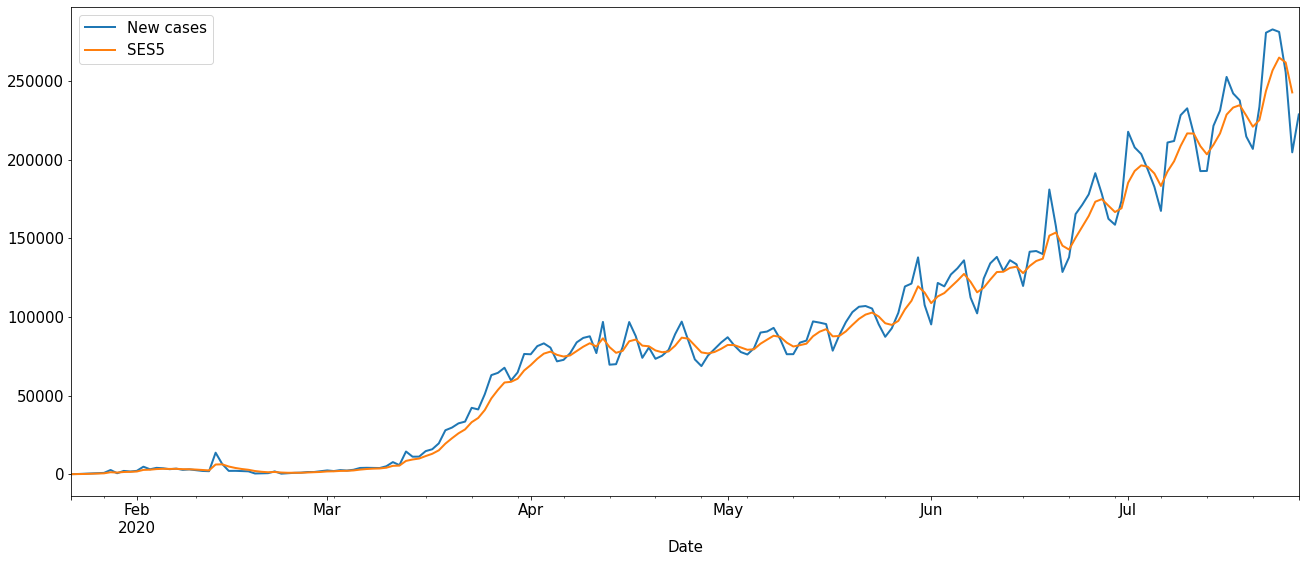

In [53]:
df[['New cases','SES5']].plot();

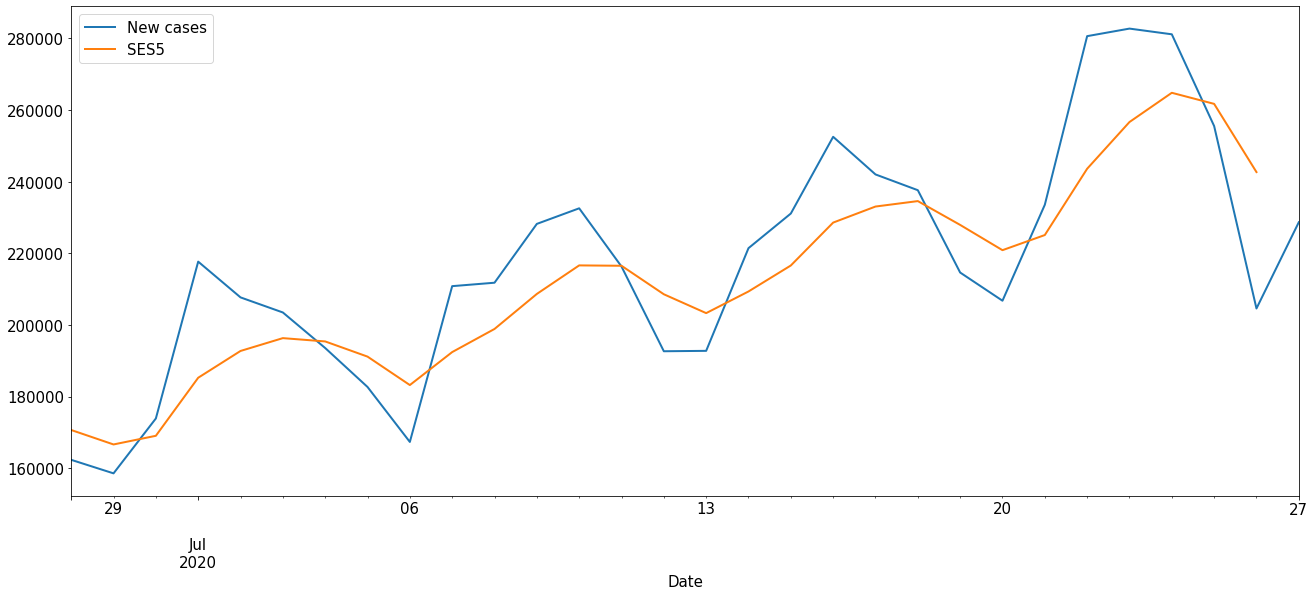

In [55]:
df[['New cases','SES5']].iloc[-30:].plot();


## Double Exponential Smoothing
A Simple Exponential Smoothing emprega apenas um fator de suavização $\alpha$ (alpha), enquanto a Double Exponential Smoothing adiciona um segundo fator de suavização $\beta$ (beta) que aborda as tendências nos dados. Assim como o fator alfa, os valores do fator beta ficam entre zero e um ($0<\beta≤1$). 

Também podemos abordar diferentes tipos de mudança (crescimento/declínio) na tendência. Se uma série temporal exibir uma tendência inclinada em linha reta, você usará um ajuste <strong>additive</strong>. Se a série temporal exibir uma tendência exponencial (curva), você usará um ajuste <strong>additive</strong>.

À medida que avançamos para a previsão, vale a pena notar que os ajustes aditivos e multiplicativos podem se tornar exagerados ao longo do tempo e exigir um <em>damping (amortecimento)</em> que reduz o tamanho da tendência em períodos futuros até atingir uma linha plana.

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd'] = ExponentialSmoothing(df['New cases'], trend='add').fit().fittedvalues.shift(-1)
df.head()

/home/pedroruas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,New cases,EWMA5,SES5,DESadd
Date,,,,
2020-01-22,0,0.00,0.00,99.49
2020-01-23,99,33.00,33.00,197.99
2020-01-24,287,117.67,117.67,385.55
2020-01-25,493,242.78,242.78,591.47
2020-01-26,684,389.85,389.85,782.56


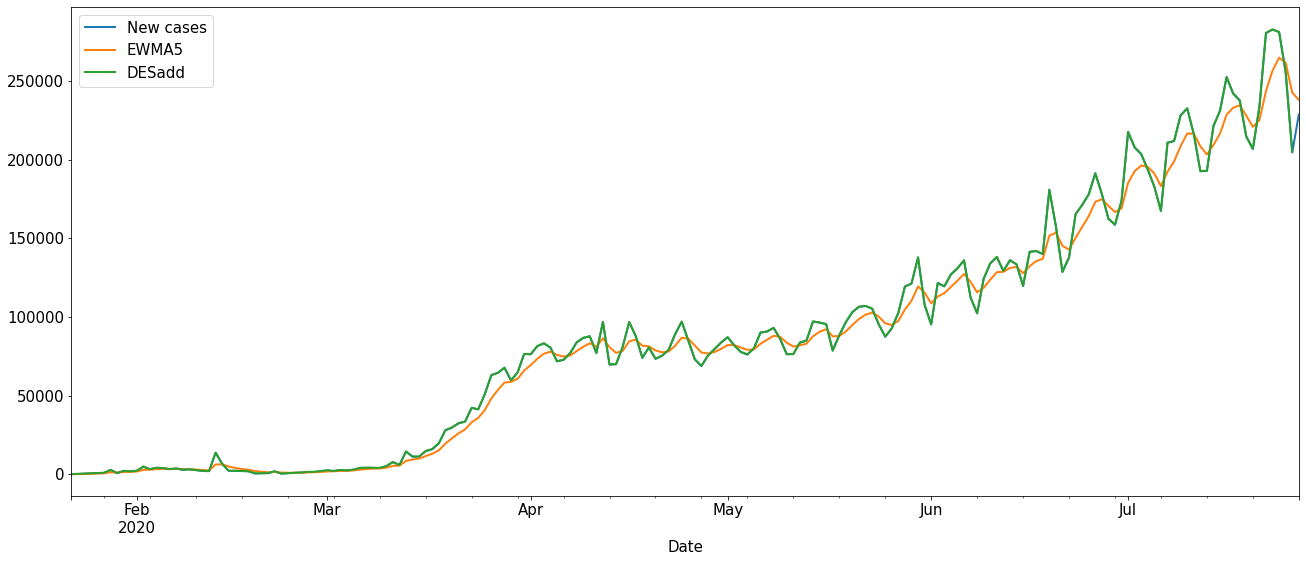

In [57]:
df[['New cases','EWMA5','DESadd']].plot();

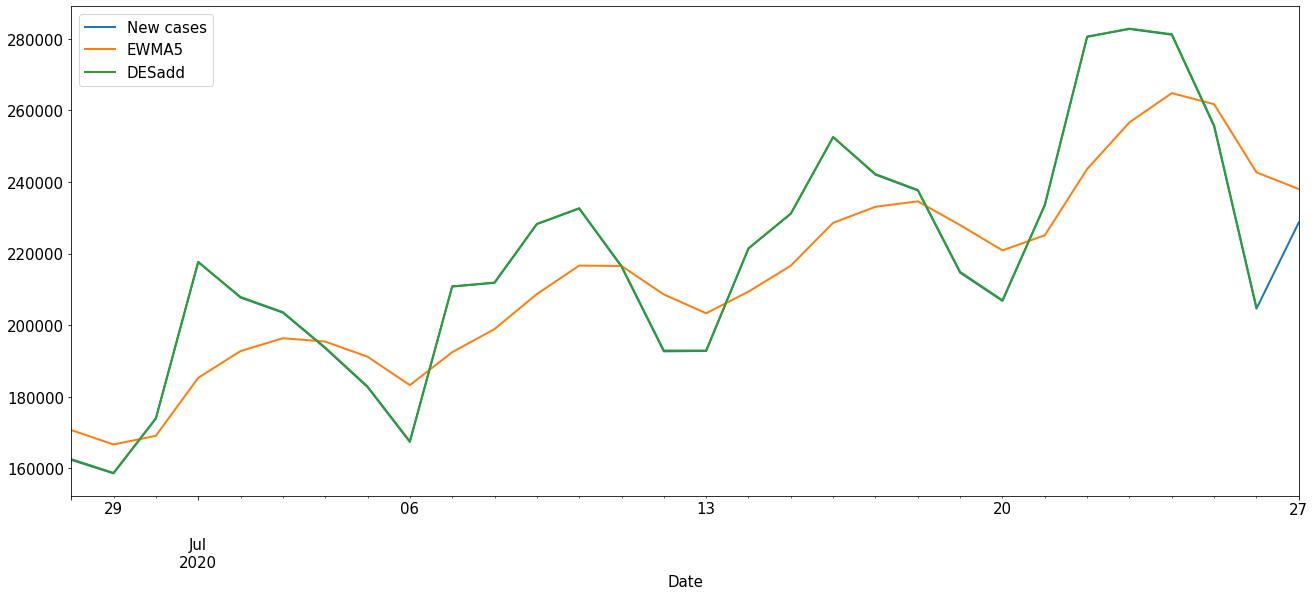

In [62]:
df[['New cases','EWMA5','DESadd']].iloc[-30:].plot();

Aqui podemos ver que a Double Exponential Smoothing é uma representação muito melhor dos dados da série temporal.<br>

In [63]:
df.head()

,New cases,EWMA5,SES5,DESadd
Date,,,,
2020-01-22,0,0.00,0.00,99.49
2020-01-23,99,33.00,33.00,197.99
2020-01-24,287,117.67,117.67,385.55
2020-01-25,493,242.78,242.78,591.47
2020-01-26,684,389.85,389.85,782.56


In [64]:
df['DESmul'] = ExponentialSmoothing(df.drop(axis=0,index='2020-01-22')['New cases'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

/home/pedroruas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,New cases,EWMA5,SES5,DESadd,DESmul
Date,,,,,
2020-01-22,0,0.00,0.00,99.49,NaN
2020-01-23,99,33.00,33.00,197.99,271.83
2020-01-24,287,117.67,117.67,385.55,784.52
2020-01-25,493,242.78,242.78,591.47,1304.60
2020-01-26,684,389.85,389.85,782.56,1731.57


In [71]:
df['Shift'] = df['DESmul'].shift(-1)
df.head()

,New cases,EWMA5,SES5,DESadd,DESmul,Shift
Date,,,,,,
2020-01-22,0,0.00,0.00,99.49,NaN,271.83
2020-01-23,99,33.00,33.00,197.99,271.83,784.52
2020-01-24,287,117.67,117.67,385.55,784.52,1304.60
2020-01-25,493,242.78,242.78,591.47,1304.60,1731.57
2020-01-26,684,389.85,389.85,782.56,1731.57,1947.39


In [73]:
df.drop(columns='Shift',inplace=True)

In [74]:
df.head()

,New cases,EWMA5,SES5,DESadd,DESmul
Date,,,,,
2020-01-22,0,0.00,0.00,99.49,NaN
2020-01-23,99,33.00,33.00,197.99,271.83
2020-01-24,287,117.67,117.67,385.55,784.52
2020-01-25,493,242.78,242.78,591.47,1304.60
2020-01-26,684,389.85,389.85,782.56,1731.57


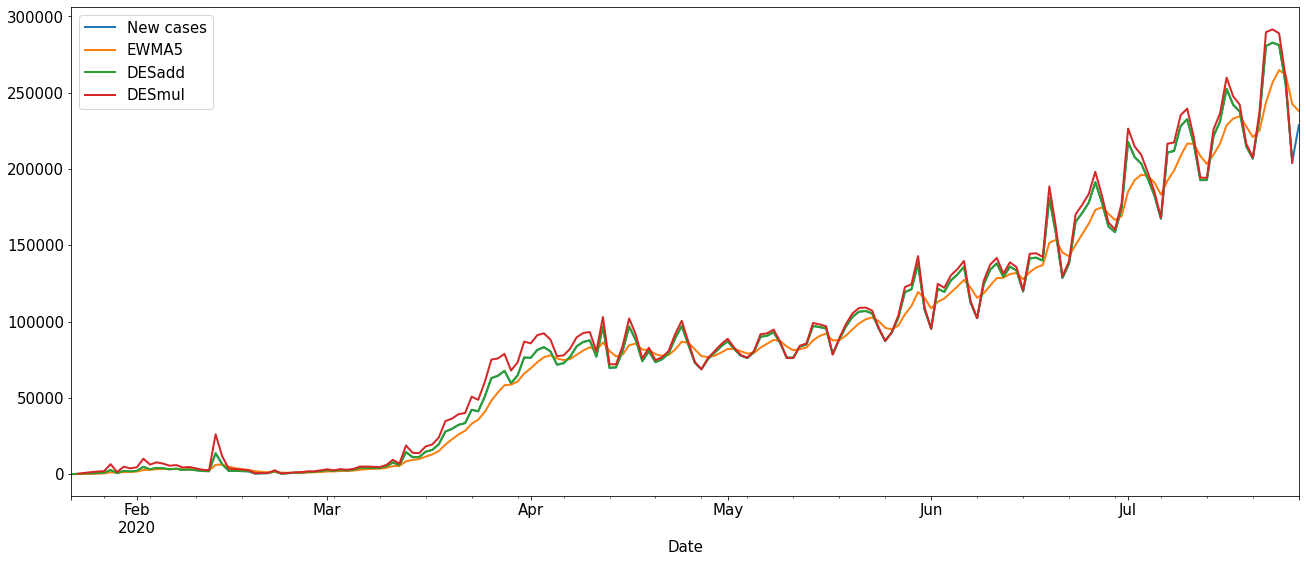

In [67]:
df[['New cases','EWMA5','DESadd','DESmul']].plot();

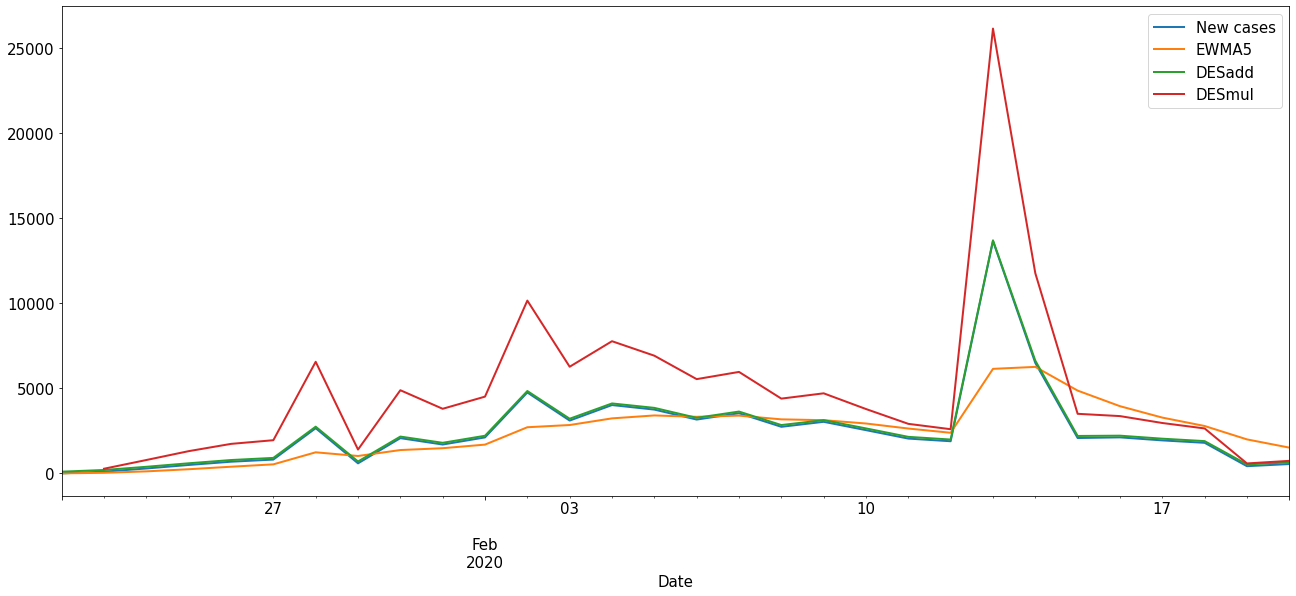

In [68]:
df[['New cases','EWMA5','DESadd','DESmul']].iloc[:30].plot();

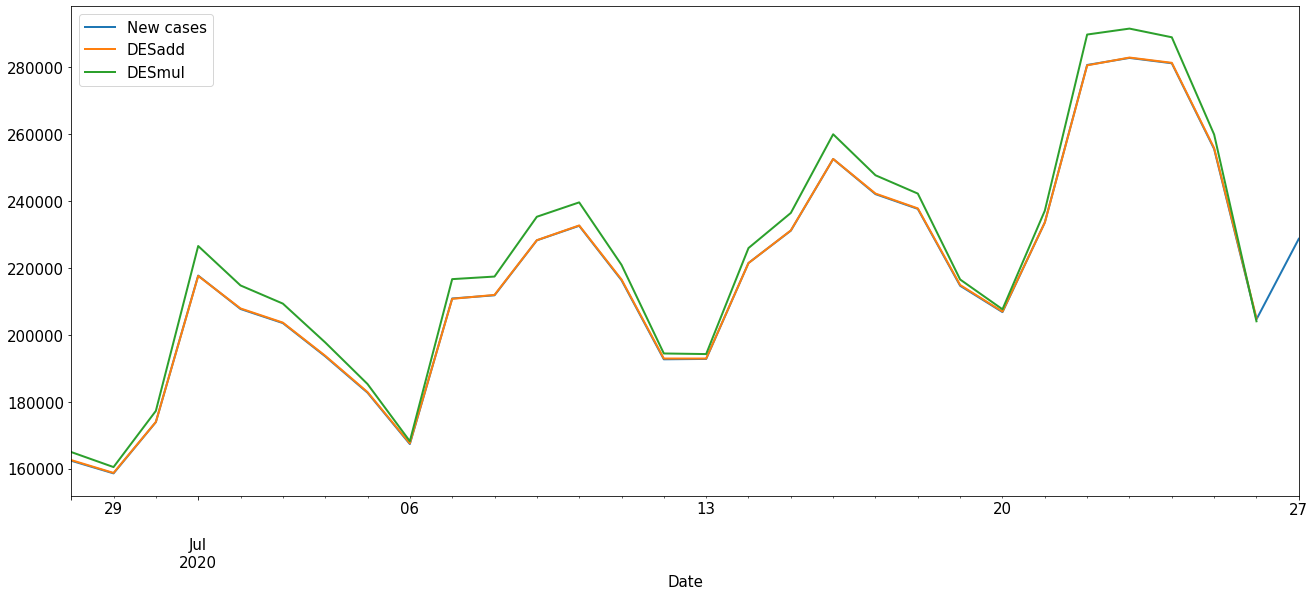

In [69]:
df[['New cases','DESadd','DESmul']].iloc[-30:].plot();

In [70]:
df[['New cases','DESadd','DESmul']].iloc[-15:]

,New cases,DESadd,DESmul
Date,,,
2020-07-13,192779,192896.07,194233.65
2020-07-14,221452,221428.50,225922.60
2020-07-15,231122,231193.78,236418.17
2020-07-16,252544,252559.62,259938.69
2020-07-17,242038,242211.93,247678.06
2020-07-18,237635,237778.75,242204.37
2020-07-19,214647,214881.23,216520.54
2020-07-20,206778,206936.28,207613.59
2020-07-21,233565,233552.27,237085.06


Parece que o ajuste 'additive' dá melhores resultados. Observe que a linha laranja se sobrepõe quase completamente aos dados originais.

___
## Triple Exponential Smoothing
A Triple Exponential Smoothing, que é o método mais associado ao Holt-Winters, adiciona suporte para tendências e sazonalidade nos dados.


In [93]:
df['TESadd5'] = ExponentialSmoothing(df['New cases'],trend='add',seasonal='add',seasonal_periods=5).fit().fittedvalues
df.head()

/home/pedroruas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,New cases,EWMA5,SES5,DESadd,DESmul,TESadd5,TESmul5
Date,,,,,,,
2020-01-22,0,0.00,0.00,99.49,NaN,249.84,NaN
2020-01-23,99,33.00,33.00,197.99,271.83,350.06,129.58
2020-01-24,287,117.67,117.67,385.55,784.52,538.05,400.66
2020-01-25,493,242.78,242.78,591.47,1304.60,744.02,693.40
2020-01-26,684,389.85,389.85,782.56,1731.57,935.00,951.88


In [94]:
df['TESmul5'] = ExponentialSmoothing(df.drop(axis=0,index='2020-01-22')['New cases'],trend='mul',seasonal='mul',seasonal_periods=5).fit().fittedvalues
df.head()

/home/pedroruas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,New cases,EWMA5,SES5,DESadd,DESmul,TESadd5,TESmul5
Date,,,,,,,
2020-01-22,0,0.00,0.00,99.49,NaN,249.84,NaN
2020-01-23,99,33.00,33.00,197.99,271.83,350.06,129.58
2020-01-24,287,117.67,117.67,385.55,784.52,538.05,400.66
2020-01-25,493,242.78,242.78,591.47,1304.60,744.02,693.40
2020-01-26,684,389.85,389.85,782.56,1731.57,935.00,951.88


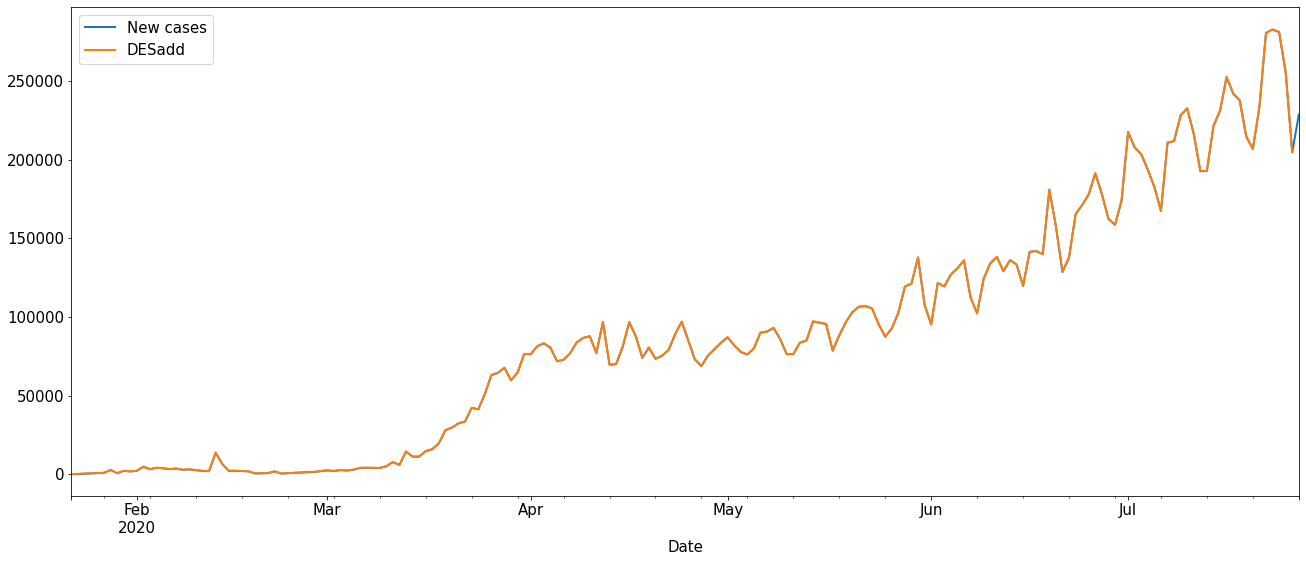

In [79]:
df[['New cases','DESadd']].plot();

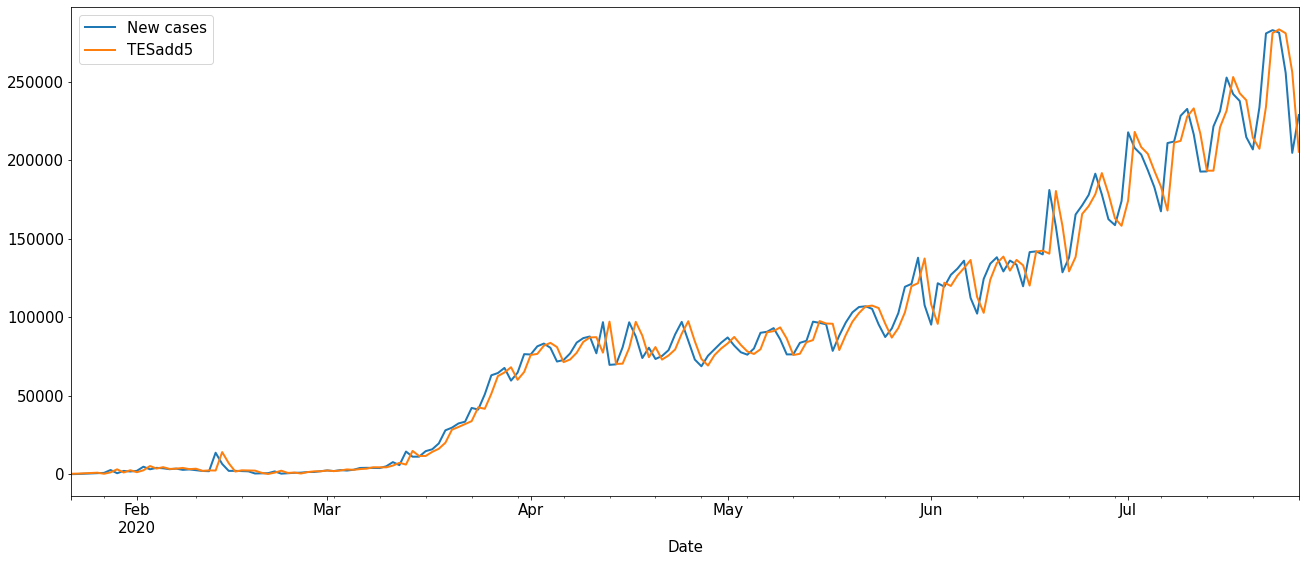

In [95]:
df[['New cases','TESadd5']].plot();

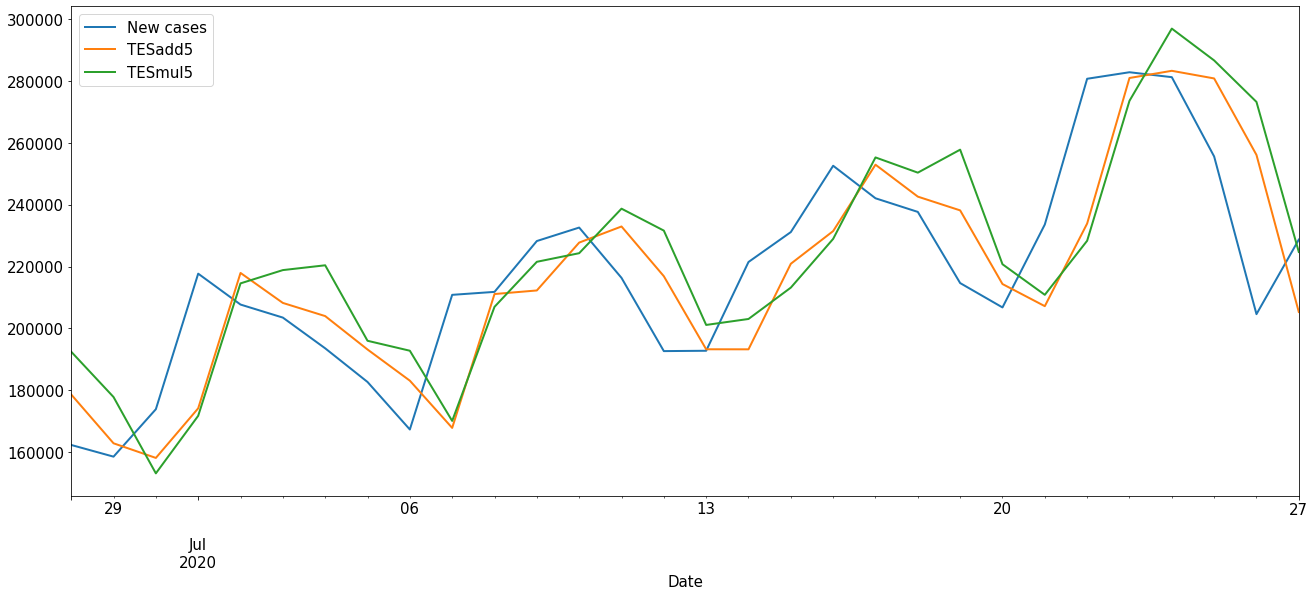

In [96]:
df[['New cases','TESadd5','TESmul5']].iloc[-30:].plot().autoscale(axis='x',tight=True);

In [97]:
df[['New cases','TESadd5','TESmul5']].iloc[-24:]

,New cases,TESadd5,TESmul5
Date,,,
2020-07-04,193567,203981.31,220390.83
2020-07-05,182695,193191.83,196005.49
2020-07-06,167343,183118.54,192788.88
2020-07-07,210844,167861.62,170117.55
2020-07-08,211802,211106.15,206971.71
2020-07-09,228227,212261.27,221517.94
2020-07-10,232577,227723.24,224296.79
2020-07-11,216328,232928.10,238681.52
2020-07-12,192668,216861.38,231597.53


Com base no gráfico acima, você pode pensar que a suavização exponencial tripla faz um trabalho pior de fit do que a Double Exponential Smoothing. A chave aqui é considerar o que vem a seguir - <em>previsão</em>. Veremos que ter a capacidade de prever padrões sazonais flutuantes melhora muito nossa previsão.


# Forecasting

## Forecasting with the Holt-Winters Method
Para este exemplo, usaremos o mesmo conjunto de dados e dividiremos os dados em registros para treinamento e para teste, e avaliaremos o desempenho do modelo.

In [101]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('Data/day_wise.csv',index_col='Date', parse_dates=True)
df = df[['New cases']]
df.index.freq = 'D'
df.head()

,New cases
Date,
2020-01-22,0
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684


In [102]:
df.shape

(188, 1)

In [104]:
df.tail(15)

,New cases
Date,
2020-07-13,192779
2020-07-14,221452
2020-07-15,231122
2020-07-16,252544
2020-07-17,242038
2020-07-18,237635
2020-07-19,214647
2020-07-20,206778
2020-07-21,233565


## Train Test Split

In [105]:
train_data = df.loc[:'2020-07-13']
test_data = df.loc['2020-07-13':]

## Fitting the Model

In [106]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['New cases'],trend='add',seasonal='add',seasonal_periods=7).fit()

/home/pedroruas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


## Evaluating Model against Test Set

In [107]:
test_predictions = fitted_model.forecast(15).rename('HW Forecast')

In [108]:
test_predictions

2020-07-14   222903.31
2020-07-15   233549.86
2020-07-16   237140.60
2020-07-17   241673.94
2020-07-18   230460.56
2020-07-19   213372.24
2020-07-20   211104.79
2020-07-21   238363.31
2020-07-22   249009.86
2020-07-23   252600.60
2020-07-24   257133.94
2020-07-25   245920.56
2020-07-26   228832.24
2020-07-27   226564.80
2020-07-28   253823.31
Freq: D, Name: HW Forecast, dtype: float64

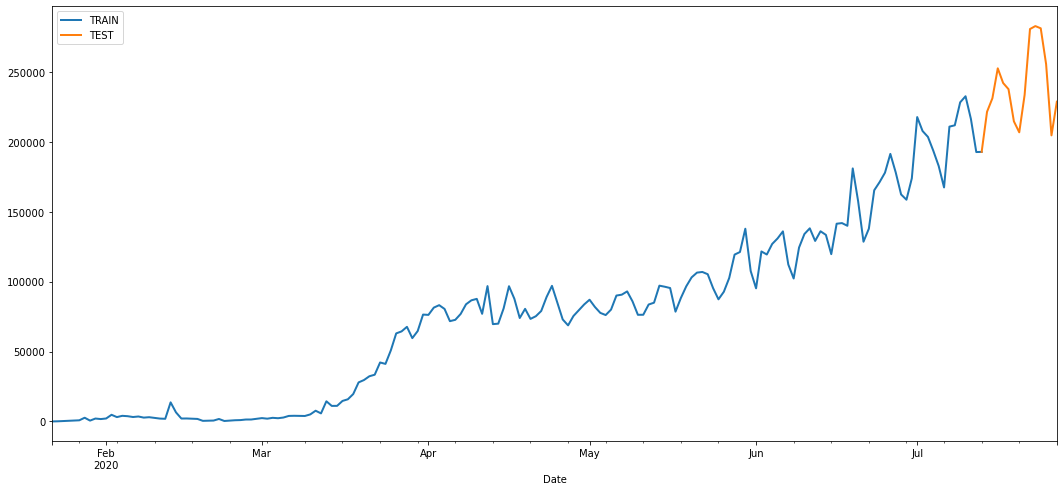

In [109]:
train_data['New cases'].plot(legend=True,label='TRAIN',figsize=(18,8))
test_data['New cases'].plot(legend=True,label='TEST');

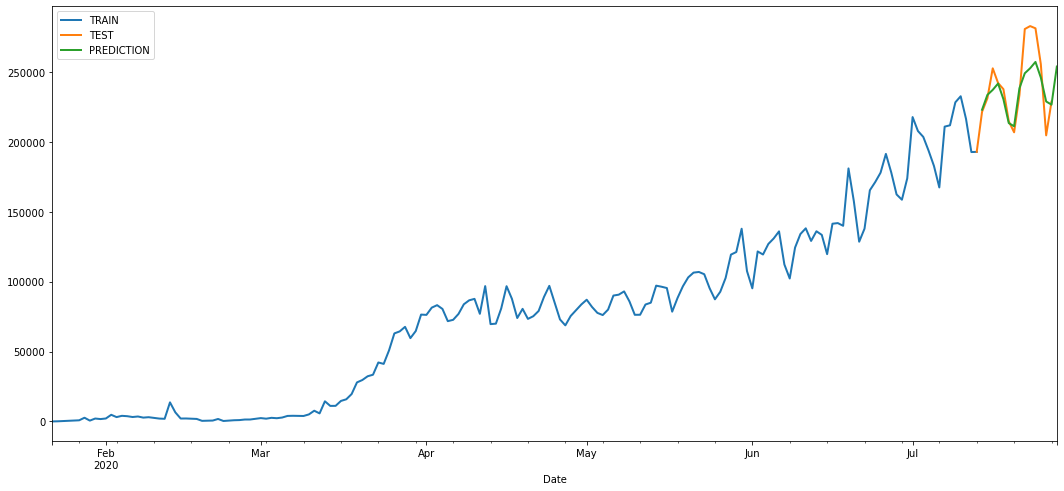

In [110]:
train_data['New cases'].plot(legend=True,label='TRAIN',figsize=(18,8))
test_data['New cases'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION');

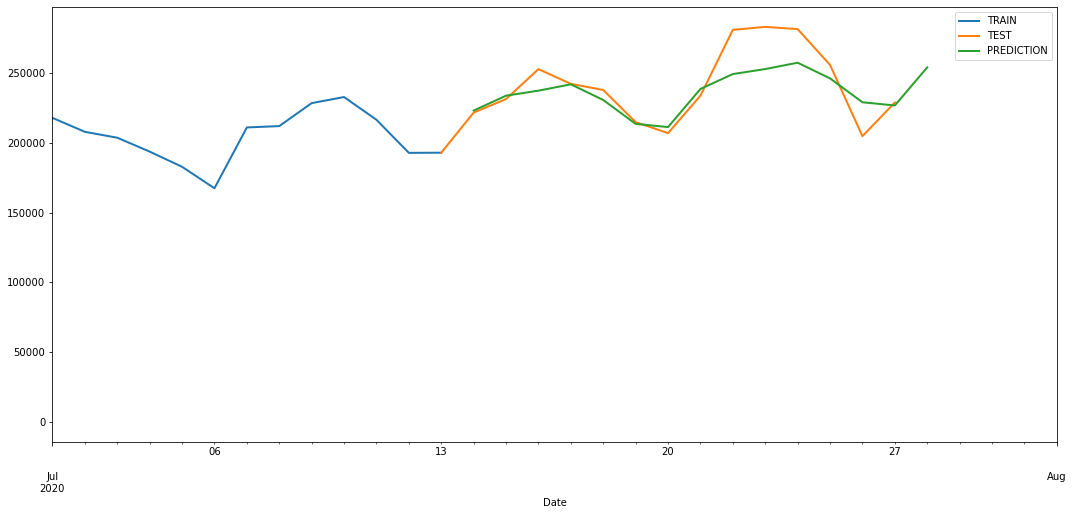

In [111]:
train_data['New cases'].plot(legend=True,label='TRAIN',figsize=(18,8))
test_data['New cases'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-07-1','2020-08-1']);

In [112]:
plt.rcParams['figure.figsize'] = [22, 9]

In [113]:
df.head()

,New cases
Date,
2020-01-22,0
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684


## Evaluation Metrics

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [115]:
test_data.shape

(15, 1)

In [116]:
test_predictions.shape

(15,)

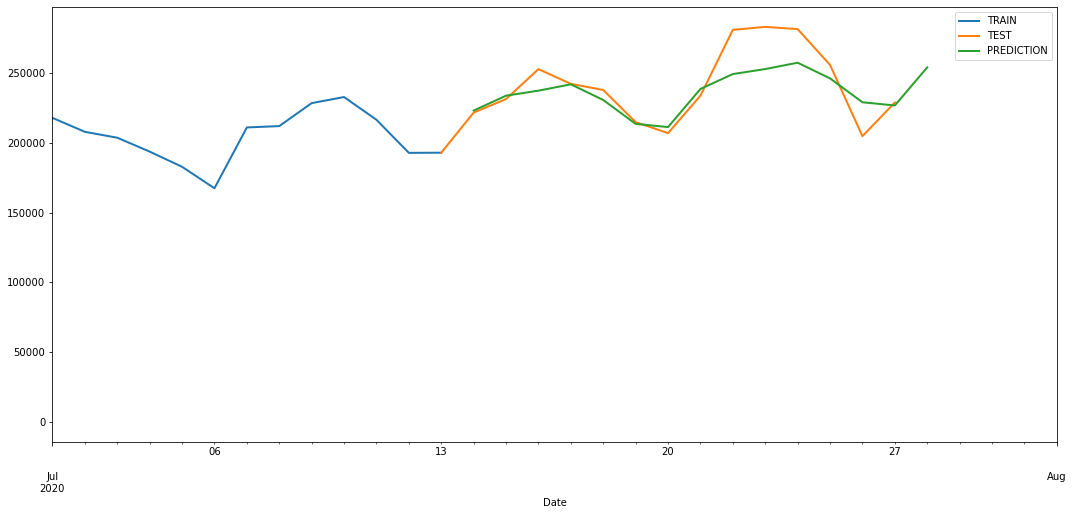

In [111]:
train_data['New cases'].plot(legend=True,label='TRAIN',figsize=(18,8))
test_data['New cases'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-07-1','2020-08-1']);

In [117]:
mean_absolute_error(test_data,test_predictions)

20549.144653368985

In [118]:
mean_squared_error(test_data,test_predictions)

512809217.8408371

In [119]:
np.sqrt(mean_squared_error(test_data,test_predictions))

22645.291295119987

In [120]:
test_data.describe()

,New cases
count,15.00
mean,237731.40
std,28444.70
min,192779.00
25%,218049.50
50%,233565.00
75%,254044.50
max,282756.00


## Forecasting into Future

In [121]:
final_model = ExponentialSmoothing(df['New cases'],trend='add',seasonal='add',seasonal_periods=7).fit()

/home/pedroruas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [134]:
forecast_predictions = final_model.forecast(15)

In [135]:
df['New cases'].tail(15)

Date
2020-07-13    192779
2020-07-14    221452
2020-07-15    231122
2020-07-16    252544
2020-07-17    242038
2020-07-18    237635
2020-07-19    214647
2020-07-20    206778
2020-07-21    233565
2020-07-22    280647
2020-07-23    282756
2020-07-24    281164
2020-07-25    255545
2020-07-26    204606
2020-07-27    228693
Freq: D, Name: New cases, dtype: int64

In [136]:
forecast_predictions

2020-07-28   259354.48
2020-07-29   284776.38
2020-07-30   289524.19
2020-07-31   285178.56
2020-08-01   267612.54
2020-08-02   235368.55
2020-08-03   245363.44
2020-08-04   274221.94
2020-08-05   299643.84
2020-08-06   304391.64
2020-08-07   300046.02
2020-08-08   282480.00
2020-08-09   250236.01
2020-08-10   260230.90
2020-08-11   289089.39
Freq: D, dtype: float64

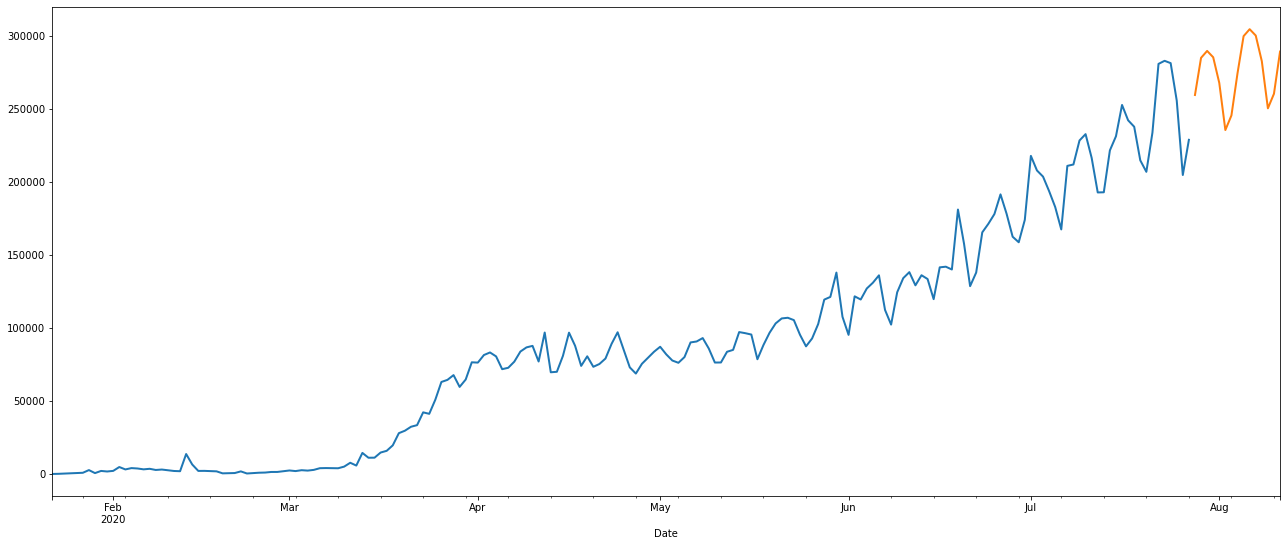

In [137]:
df['New cases'].plot()
forecast_predictions.plot();